In [127]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sys.path.append(os.path.dirname(os.path.realpath(os.getcwd())))
# from tools import merge_matrix, hic_norm

In [128]:
def calculate_significant(file_path, length, cut):
    significants = []
    with open(file_path, "r") as f:
        datas = f.readlines()
        for data in datas[1:]:
            data = data.split()
            x, y = int(int(data[1])/1000), int(int(data[3])/1000)
            q_value = float(data[6])
            if abs(x-y)>length or abs(x-y)<5 or q_value>cut:
                continue
            significants.append((x, y, q_value))
    return significants

In [99]:
enhanced_cut, length = 1e-11, 12
enhanced_chr1_path = '/data1/lmh_data/MMSR_complete/analyse/GM12878/analyse/experiment_diff_loop/loop/enhanced/chr1_1000b/outputs/FitHiC.spline_pass1.res1000.significances.txt'
enhanced_chr1_significants = calculate_significant(enhanced_chr1_path, length, enhanced_cut)
print(len(enhanced_chr1_significants))

1461


In [100]:
hr_cut = 1e-11
hr_chr1_path = '/data1/lmh_data/MMSR_complete/analyse/GM12878/analyse/experiment_diff_loop/loop/hr/chr1_1000b/outputs/FitHiC.spline_pass1.res1000.significances.txt'
hr_chr1_nums = calculate_significant(hr_chr1_path, length, hr_cut)
print(len(hr_chr1_nums))

10095


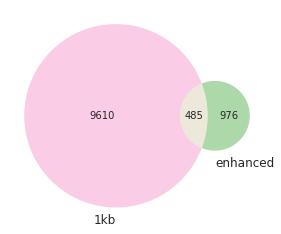

In [101]:
from matplotlib_venn import venn2
venn2(subsets = [set(hr_chr1_nums), set(enhanced_chr1_significants)], set_labels = ('1kb', 'enhanced'), set_colors=((247/255, 129/255, 191/255), (51/255, 160/255, 44/255)))
plt.show()

In [117]:
def test(path, length):
    cut = 1
    significants = calculate_significant(path, length, cut)
    significants = np.array(significants)
    nums = significants.shape[0]
    while True:
        cut /= 10
        _q_values = significants[:, 2] < cut
        _nums = np.sum(_q_values)
        if abs(nums - _nums) / _nums < 0.001:
            return significants[np.where(_q_values)[0], :]
        nums = _nums

In [121]:
hr_result = test(hr_chr1_path, length)[:, :2]
print(hr_result.shape)

(1259, 2)


In [124]:
hr_significants = list(map(tuple, hr_result))

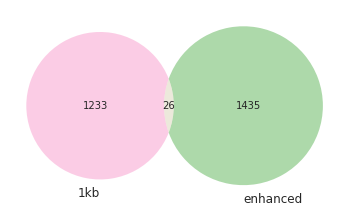

In [125]:
from matplotlib_venn import venn2
venn2(subsets = [set(hr_significants), set(enhanced_chr1_significants)], set_labels = ('1kb', 'enhanced'), set_colors=((247/255, 129/255, 191/255), (51/255, 160/255, 44/255)))
plt.show()

In [ ]:
print(len(test(enhanced_chr1_path, length)))

In [56]:
cuts = [10**number for number in range(-10,0)]
enhanced_chr1_path = '/data1/lmh_data/MMSR_complete/analyse/GM12878/analyse/experiment_diff_loop/loop/enhanced/chr1_1000b/outputs/FitHiC.spline_pass1.res1000.significances.txt'
significants = []
for cut in cuts:
    _significants = calculate_significant(enhanced_chr1_path, length, cut)
    significants.append(len(_significants))

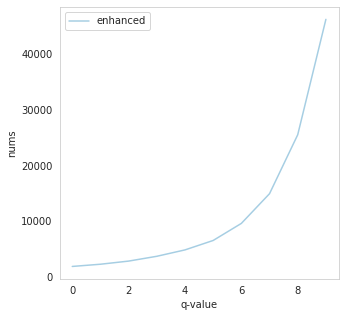

In [58]:
sns.set_style("whitegrid") 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharey=True)
axes.grid(False)
axes.plot(list(range(len(significants))), significants, color=(166/255, 206/255, 227/255), label='enhanced')

# plt.ylim(0, 1)
plt.xlabel('q-value')
plt.ylabel('nums')
# plt.xlim(0, len(significants))
plt.legend()
plt.show()

In [73]:
cuts = [10**number for number in range(-20,0)]
hr_chr1_path = '/data1/lmh_data/MMSR_complete/analyse/GM12878/analyse/experiment_diff_loop/loop/hr/chr1_1000b/outputs/FitHiC.spline_pass1.res1000.significances.txt'
significants = []
for cut in cuts:
    _significants = calculate_significant(hr_chr1_path, length, cut)
    significants.append(len(_significants))

In [126]:
sns.set_style("whitegrid") 
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), sharey=True)
axes.grid(False)
axes.plot(list(range(len(significants))), significants, color=(166/255, 206/255, 227/255), label='enhanced')

# plt.ylim(0, 1)
plt.xlabel('q-value')
plt.ylabel('nums')
# plt.xlim(0, len(significants))
plt.legend()
plt.show()

/home/lmh/anaconda3/envs/MMSR/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AttributeError: 'int' object has no attribute 'shape'